##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
# Imports and set logging level to error only

import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
print(10**6)

1000000


In [3]:
from typing import Tuple, List
import random
def celsius_fahrenheit(count: int) -> Tuple[List, List]:
    random.seed(a=None, version=2)
    celsius = []
    fahr = []
    for i in range(0, count):
        c :float = random.uniform(-273, 5000)
        f :float = c * 1.8 + 32
        celsius.append(c)
        fahr.append(f)
    return (celsius, fahr)

celsius, fahrenheit = celsius_fahrenheit(10**4)
celsius_q = np.array(celsius, dtype=float)
fahrenheit_a = np.array(fahrenheit, dtype=float)
# for c,f in zip(celsius, fahrenheit):
#     print(f"{c} degrees celsius = {f} degrees fahrenheit")


In [4]:
# celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
# fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

# for i,c in enumerate(celsius_q):
#  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

In [5]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [6]:
model = tf.keras.Sequential([l0])

2021-10-23 00:22:13.218353: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-23 00:22:13.218968: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


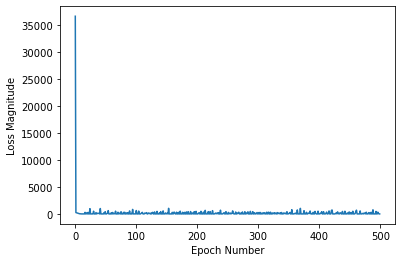

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [14]:
print(model.predict([100.0, -40]))

[[211.99905 ]
 [-40.005318]]


In [11]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8000312]], dtype=float32), array([31.995935], dtype=float32)]


In [13]:
# l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
# l1 = tf.keras.layers.Dense(units=4)
# l2 = tf.keras.layers.Dense(units=1)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=[1]),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=1)
])
model3.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model3.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model3.predict([100.0, -40]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model3.predict([100.0])))
# print("These are the l0 variables: {}".format(l0.get_weights()))
# print("These are the l1 variables: {}".format(l1.get_weights()))
# print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.44498]
 [-38.74373]]
Model predicts that 100 degrees Celsius is: [[211.44498]] degrees Fahrenheit
